NGUYỄN TRỌNG HUY - MSSV 51900507
PHẠM TRƯỜNG GIANG - MSSV 51900793

In [ ]:
pip install accuracy seaborn

In [1]:
import accuracy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu
df = pd.read_csv('seattleWeather_1948-2017.csv')

df["DATE"] = pd.to_datetime(df["DATE"], errors='coerce')
df = df.apply(pd.to_numeric, errors='ignore')

In [3]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,-694310400000000000,0.47,51,42,1.0
1,-694224000000000000,0.59,45,36,1.0
2,-694137600000000000,0.42,45,35,1.0
3,-694051200000000000,0.31,45,34,1.0
4,-693964800000000000,0.17,45,32,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  int64  
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 998.2 KB


In [5]:

df.describe()

,DATE,PRCP,TMAX,TMIN,RAIN
count,2.555100e+04,25548.000000,25551.000000,25551.000000,25548.000000
mean,4.094496e+17,0.106222,59.544206,44.514226,0.426648
std,6.372935e+17,0.239031,12.772984,8.892836,0.494600
min,-6.943104e+17,0.000000,4.000000,0.000000,0.000000
25%,-1.424304e+17,0.000000,50.000000,38.000000,0.000000
50%,4.094496e+17,0.000000,58.000000,45.000000,0.000000
75%,9.613296e+17,0.100000,69.000000,52.000000,1.000000
max,1.513210e+18,5.020000,103.000000,71.000000,1.000000


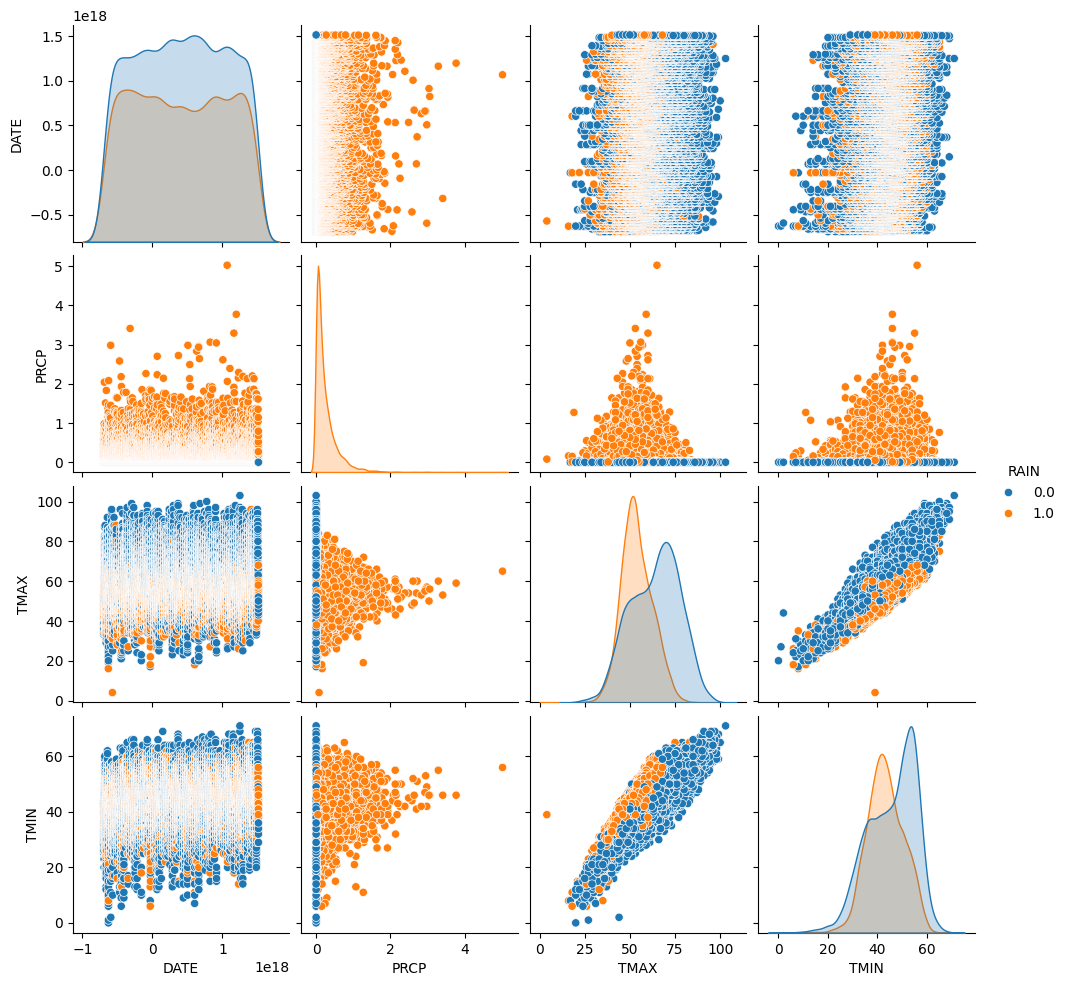

In [6]:
# Vẽ biểu đồ phân bố các đặc trưng
sns.pairplot(df, hue='RAIN')
plt.show()

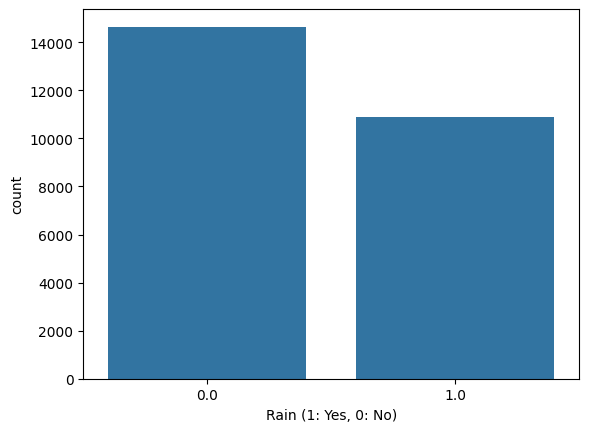

In [7]:
# Xem tần suất mưa và không mưa
sns.countplot(x='RAIN', data=df)
plt.xlabel('Rain (1: Yes, 0: No)')
plt.show()

In [8]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64


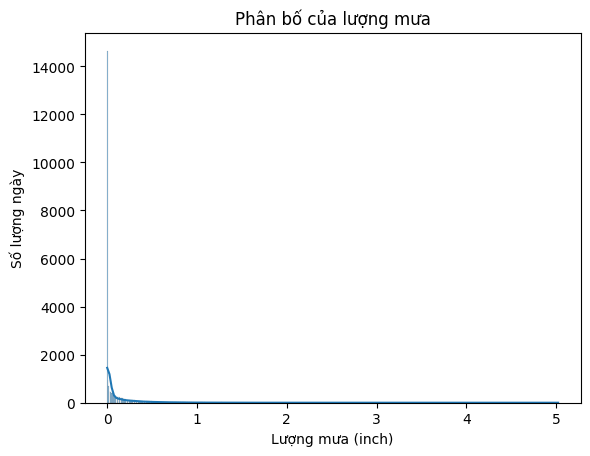

In [9]:
# Vẽ biểu đồ phân bố lượng mưa
sns.histplot(df["PRCP"], kde=True)
plt.xlabel("Lượng mưa (inch)")
plt.ylabel("Số lượng ngày")
plt.title("Phân bố của lượng mưa")
plt.show()

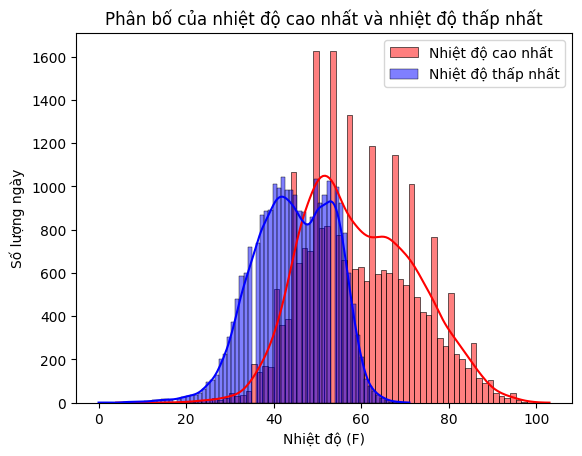

In [10]:
# Xem phân bố của nhiệt độ cao nhất và nhiệt độ thấp nhất
sns.histplot(df["TMAX"], kde=True, color="red", label="Nhiệt độ cao nhất")
sns.histplot(df["TMIN"], kde=True, color="blue", label="Nhiệt độ thấp nhất")
plt.xlabel("Nhiệt độ (F)")
plt.ylabel("Số lượng ngày")
plt.title("Phân bố của nhiệt độ cao nhất và nhiệt độ thấp nhất")
plt.legend()
plt.show()

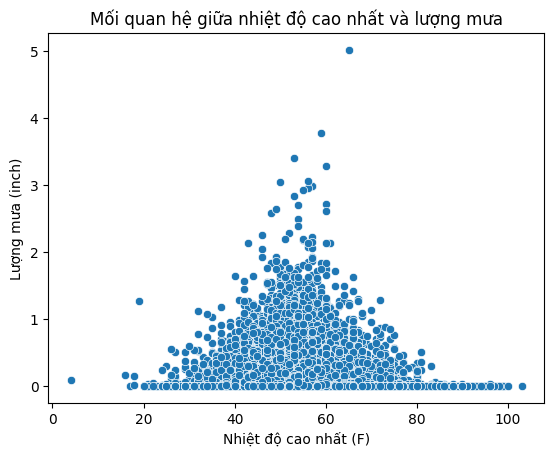

In [11]:
# Xem mối quan hệ giữa nhiệt độ cao nhất và lượng mưa
sns.scatterplot(x="TMAX", y="PRCP", data=df)
plt.xlabel("Nhiệt độ cao nhất (F)")
plt.ylabel("Lượng mưa (inch)")
plt.title("Mối quan hệ giữa nhiệt độ cao nhất và lượng mưa")
plt.show()

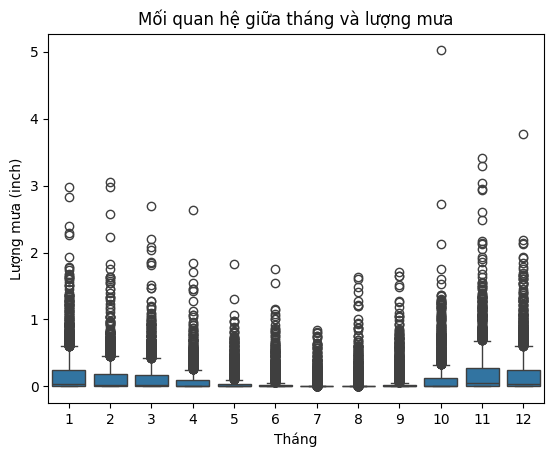

In [12]:
# Xem mối quan hệ giữa tháng và lượng mưa
df["MONTH"] = pd.to_datetime(df["DATE"]).dt.month # Tạo cột mới là tháng từ cột ngày
sns.boxplot(x="MONTH", y="PRCP", data=df)
plt.xlabel("Tháng")
plt.ylabel("Lượng mưa (inch)")
plt.title("Mối quan hệ giữa tháng và lượng mưa")
plt.show()

### Xây dựng mô hình hồi quy tuyến tính để dự đoán lượng mưa dựa trên nhiệt độ cao nhất

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
# Kiểm tra lại thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  int64  
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  float64
 5   MONTH   25551 non-null  int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 1.1 MB


Tiền xử lý dữ liệu

In [15]:
# Loại bỏ dữ liệu trùng lặp
df = df.drop_duplicates()
# Loại bỏ các giá trị thiếu
df = df.dropna()
X = df["TMAX"].values.reshape(-1, 1)
y = df["PRCP"].dropna().values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Chuẩn hóa dữ liệu sử dụng StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Sử dụng mô hình LinearRegression

In [17]:
# Huấn luyện mô hình
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = linear_model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = linear_model.score(X_test, y_test)
print("\nLinear Regression Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.05188079856317338
Root Mean Squared Error (RMSE): 0.22777356862281756
R^2 Score: 0.052703397090726134


Sử dụng mô hình Random Forest

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Tách dữ liệu thành features (X) và target (y)
X = df[['TMAX', 'TMIN']]
y = df['RAIN']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Áp dụng mô hình Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình Random Forest
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# In kết quả
print('Random Forest Model Evaluation:')
print('Accuracy:', accuracy_rf)
print('Confusion matrix:\n', conf_matrix_rf)
print('Classification report:\n', class_report_rf)


Random Forest Model Evaluation:
Accuracy: 0.7489236790606654
Confusion matrix:
 [[2215  738]
 [ 545 1612]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.80      0.75      0.78      2953
         1.0       0.69      0.75      0.72      2157

    accuracy                           0.75      5110
   macro avg       0.74      0.75      0.75      5110
weighted avg       0.75      0.75      0.75      5110



Sử Dụng Mô Hình Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Áp dụng mô hình Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Dự đoán và đánh giá mô hình
y_pred_logistic = logistic_model.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

# In kết quả
print('Logistic Regression Model Evaluation:')
print('Accuracy:', accuracy_logistic)
print('Confusion matrix:\n', conf_matrix_logistic)
print('Classification report:\n', class_report_logistic)


Logistic Regression Model Evaluation:
Accuracy: 0.6610567514677104
Confusion matrix:
 [[2150  803]
 [ 929 1228]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.70      0.73      0.71      2953
         1.0       0.60      0.57      0.59      2157

    accuracy                           0.66      5110
   macro avg       0.65      0.65      0.65      5110
weighted avg       0.66      0.66      0.66      5110



Sử dụng Feed Forward Neural Network và Reccurent Neural Network

In [20]:
from sklearn.neural_network import MLPClassifier

# Áp dụng mô hình FNN
fnn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
fnn_model.fit(X_train_scaled, y_train)

# Dự đoán và đánh giá mô hình FNN
y_pred_fnn = fnn_model.predict(X_test_scaled)
accuracy_fnn = accuracy_score(y_test, y_pred_fnn)
conf_matrix_fnn = confusion_matrix(y_test, y_pred_fnn)
class_report_fnn = classification_report(y_test, y_pred_fnn)

# In kết quả
print('Feed Forward Neural Network Model Evaluation:')
print('Accuracy:', accuracy_fnn)
print('Confusion matrix:\n', conf_matrix_fnn)
print('Classification report:\n', class_report_fnn)


Feed Forward Neural Network Model Evaluation:
Accuracy: 0.6802348336594912
Confusion matrix:
 [[1908 1045]
 [ 589 1568]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.65      0.70      2953
         1.0       0.60      0.73      0.66      2157

    accuracy                           0.68      5110
   macro avg       0.68      0.69      0.68      5110
weighted avg       0.69      0.68      0.68      5110



Tránh Overfitting cho mô hình Ensemble Learning

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [22]:
# Tạo một RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Tìm các siêu tham số tốt nhất bằng Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất
print("Best Hyperparameters:", grid_search.best_params_)

# Sử dụng mô hình với các siêu tham số tốt nhất
best_rf_classifier = grid_search.best_estimator_

# Đánh giá mô hình với Cross Validation
cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=3, scoring='accuracy')
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Cross Validation Scores: [0.75752238 0.76309996 0.77113917]
Mean CV Score: 0.7639205019407104
